## Import nescessary library

In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

from statsmodels.graphics.regressionplots import influence_plot

## 1. Data Collection

In [45]:
corolla = pd.read_csv('ToyotaCorolla.csv')
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [46]:
corolla_2 = corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla_2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# 2. Data Understanding

#### Intial anaylsis

In [47]:
corolla_2.shape

(1436, 9)

In [48]:
corolla_2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [49]:
corolla_2.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [50]:
corolla_2.describe(include= "all")

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


## Assumptions Check

### 1. Test for Linearity

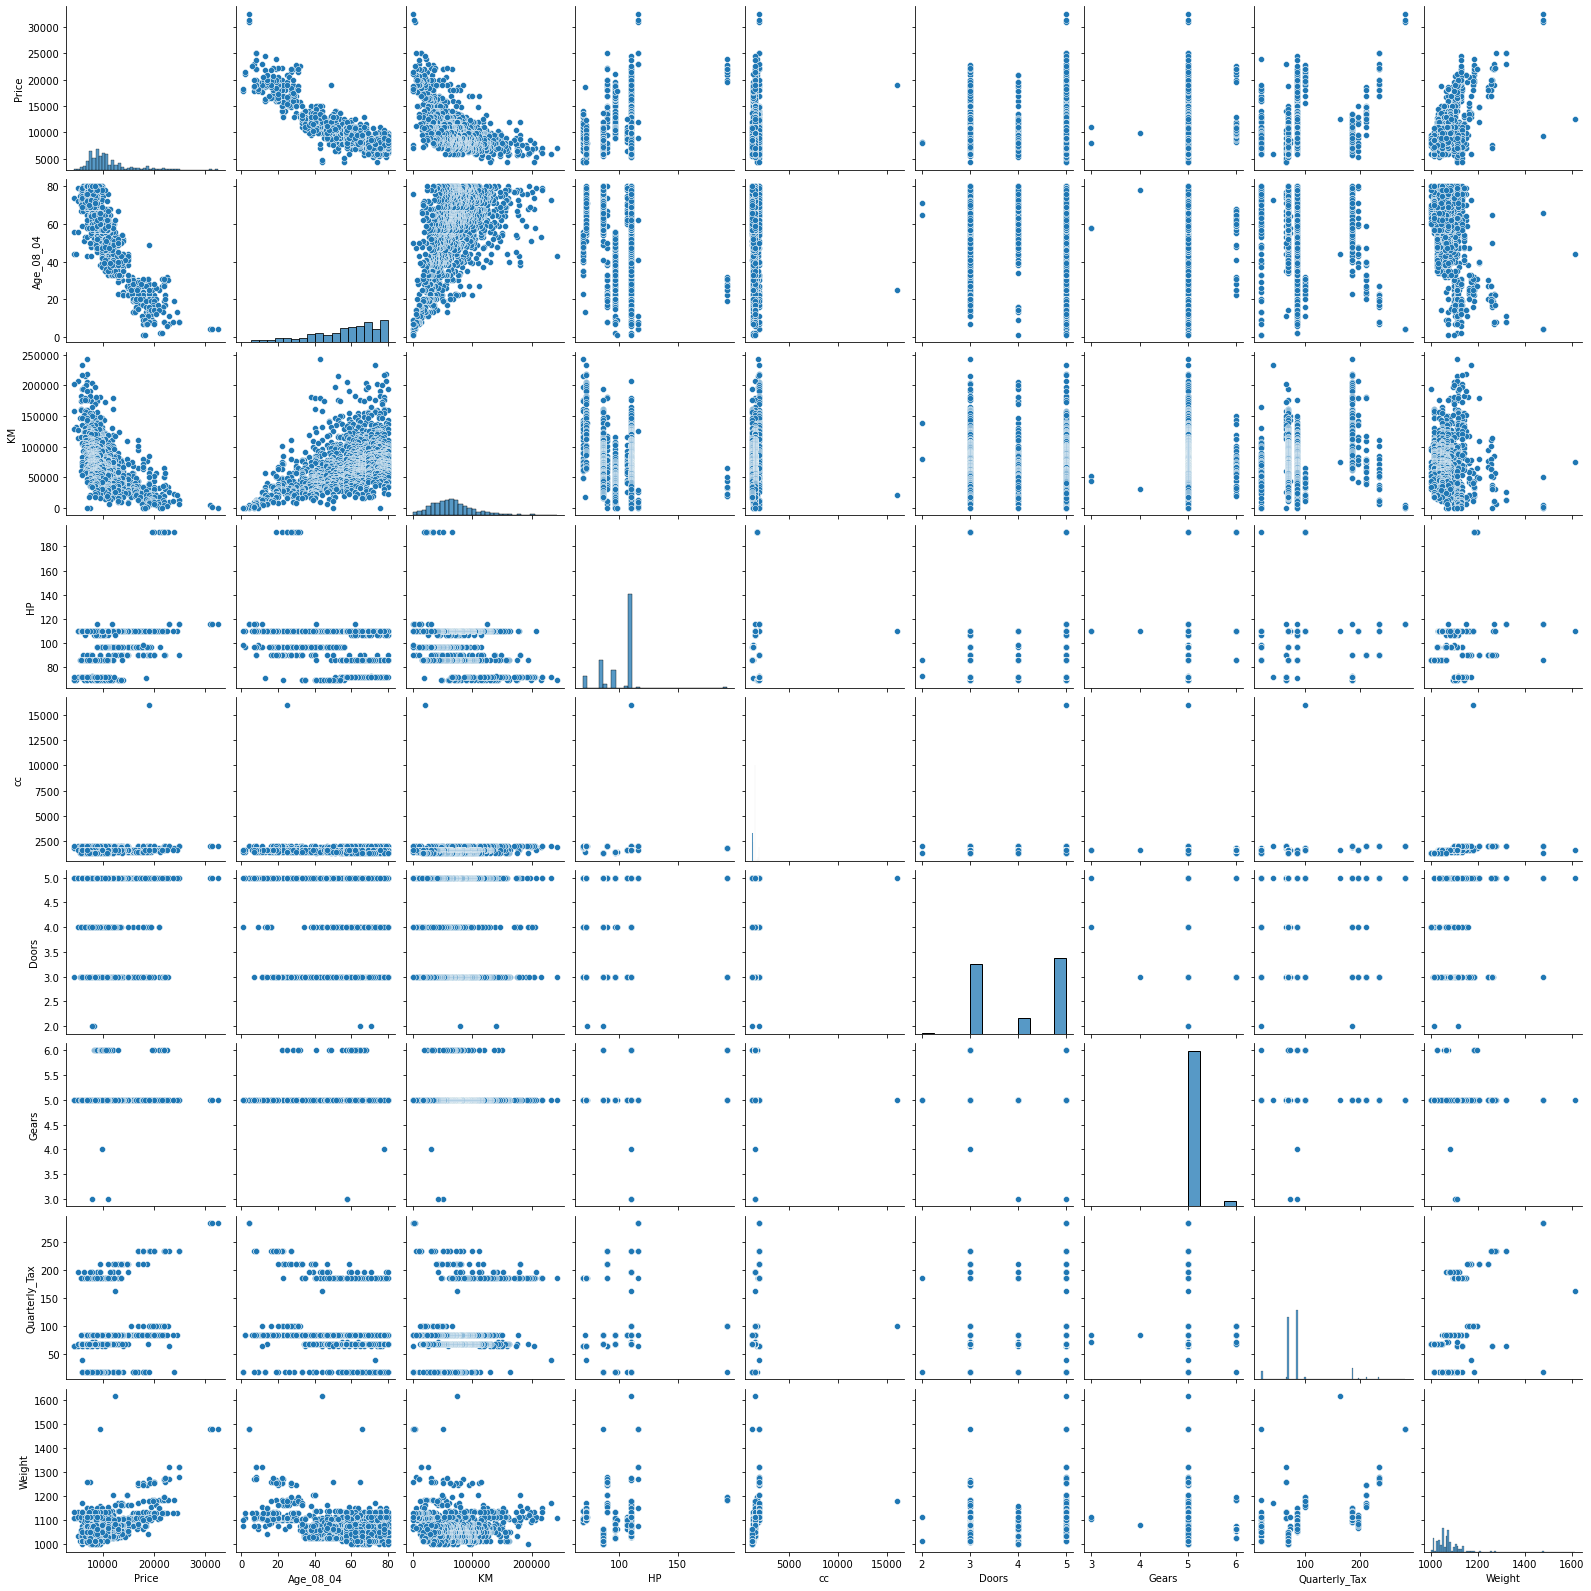

In [51]:
sns.pairplot(data= corolla_2)

### 2. Test for Normailty

<AxesSubplot:xlabel='Age_08_04', ylabel='Density'>

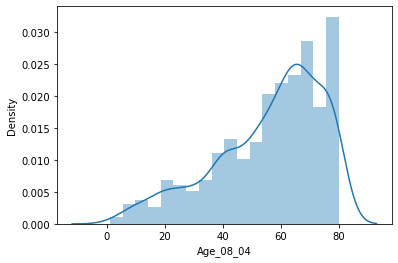

In [52]:
sns.distplot(corolla_2.Age_08_04)

<AxesSubplot:xlabel='KM', ylabel='Density'>

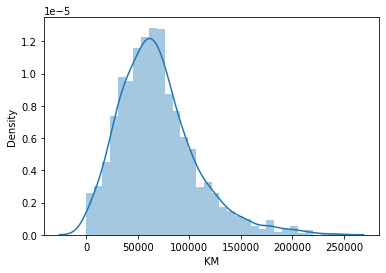

In [53]:
sns.distplot(corolla_2.KM)

#### Using Probplot

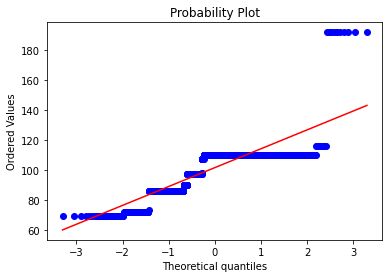

In [56]:
from scipy import stats
stats.probplot(corolla_2.HP,plot= plt)
plt.show()

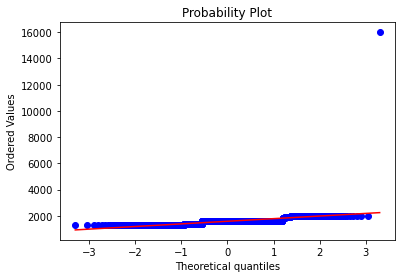

In [57]:
stats.probplot(corolla_2.cc,plot= plt)
plt.show()

<AxesSubplot:xlabel='Quarterly_Tax', ylabel='Density'>

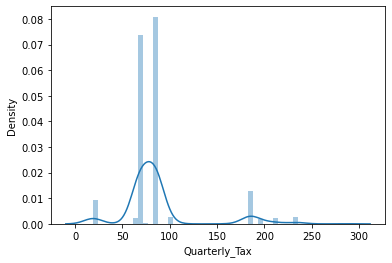

In [58]:
sns.distplot(corolla_2.Quarterly_Tax)

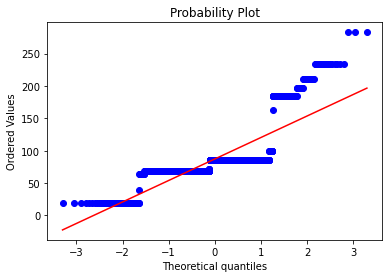

In [59]:
stats.probplot(corolla_2.Quarterly_Tax,plot= plt)
plt.show()

<AxesSubplot:xlabel='Gears', ylabel='Doors'>

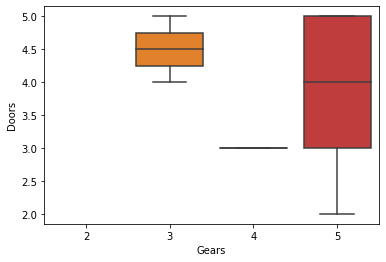

In [70]:
sns.boxplot( y= corolla_2.Doors,x= corolla_2.Gears ,order=[2,3,4,5])

### Normailty Test failed

### 3. No Autoregression - Passed

### 4. Multicollinearity

In [74]:
corr_mat = round(corolla_2.corr(),3)
corr_mat

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000,-0.877,-0.570,0.315,0.126,0.185,0.063,0.219,0.581
Age_08_04,-0.877,1.000,0.506,-0.157,-0.098,-0.148,-0.005,-0.198,-0.470
KM,-0.570,0.506,1.000,-0.334,0.103,-0.036,0.015,0.278,-0.029
HP,0.315,-0.157,-0.334,1.000,0.036,0.092,0.209,-0.298,0.090
cc,0.126,-0.098,0.103,0.036,1.000,0.080,0.015,0.307,0.336
Doors,0.185,-0.148,-0.036,0.092,0.080,1.000,-0.160,0.109,0.303
Gears,0.063,-0.005,0.015,0.209,0.015,-0.160,1.000,-0.005,0.021
Quarterly_Tax,0.219,-0.198,0.278,-0.298,0.307,0.109,-0.005,1.000,0.626
Weight,0.581,-0.470,-0.029,0.090,0.336,0.303,0.021,0.626,1.000


<AxesSubplot:>

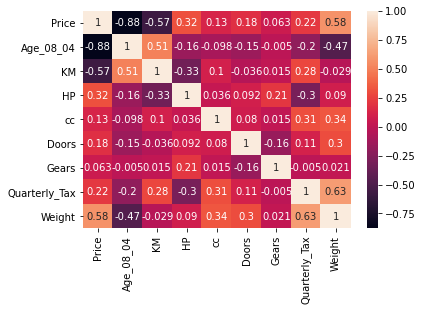

In [77]:
sns.heatmap(data=corr_mat,annot= True)

## Model Building

In [82]:
X = corolla_2.drop(labels='Price',axis=1)
y = corolla[['Price']]

In [107]:
corolla_2_linear = smf.ols('Price~Age_08_04 + KM +  HP + Doors + cc +Gears + Quarterly_Tax + Weight',data=corolla_2).fit()

In [101]:
corolla_2_linear.params

Intercept       -5478.477784
Age_08_04        -121.699859
KM                 -0.020938
HP                 31.326890
Gears             598.965326
Quarterly_Tax       3.737135
Weight             16.725110
dtype: float64

In [108]:
corolla_2_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:14:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
corolla_2_linear.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
Doors             9.677716e-01
cc                1.790902e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

## Model Testing

In [109]:
y_pred = corolla_2_linear.predict(X)
y_pred

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [148]:
error = corolla_2_linear.resid_pearson
print(error)

[-2.46752307 -1.87888856 -2.123495   ...  0.03404316 -0.98924832
 -2.5717024 ]


# Model evaluation

## Cal VIF

In [190]:
corolla_2.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [117]:
rsq_Age = smf.ols('Age_08_04 ~ KM +  HP + Doors + cc +Gears + Quarterly_Tax + Weight',data=corolla_2).fit().rsquared  
vif_Age = 1/(1-rsq_Age)
vif_Age

1.8846198056602876

In [120]:
rsq_KM = smf.ols('KM ~ Age_08_04 +  HP + Doors + cc +Gears + Quarterly_Tax + Weight',data=corolla_2).fit().rsquared  
vif_KM = 1/(1-rsq_KM)
vif_KM

1.7569047782042884

In [121]:
rsq_cc = smf.ols('cc ~ Age_08_04 +  HP + Doors + KM +Gears + Quarterly_Tax + Weight',data=corolla_2).fit().rsquared  
vif_cc = 1/(1-rsq_cc)
vif_cc

1.1638939849423795

In [122]:
rsq_doors = smf.ols('Doors ~ Age_08_04 +  HP + cc + KM +Gears + Quarterly_Tax + Weight',data=corolla_2).fit().rsquared  
vif_doors = 1/(1-rsq_doors)
vif_doors

1.1565752070760438

## Not much variartion between independent variables

## Homoscdascity ChecK

In [145]:
plt.scatter(x = corolla_2['KM']rror)
plt.title('standard- Age Vs Error')
plt.axhline(0,color ='black')

SyntaxError: invalid syntax (<ipython-input-145-3ffa16556d93>, line 1)

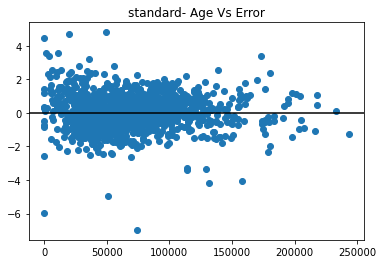

In [149]:
plt.scatter(x = corolla_2['KM'],y = error)
plt.title('standard- Age Vs Error')
plt.axhline(0,color ='black')

### Homoscadascity test failed

#  Zero Residual mean

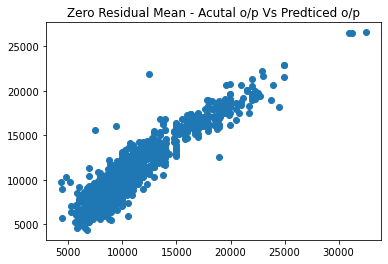

In [133]:
plt.scatter(x = y , y= y_pred)
plt.title('Zero Residual Mean - Acutal o/p Vs Predticed o/p')
plt.show()

# Using sklearn library

In [134]:
linear = LinearRegression()
linear.fit(X,y)

LinearRegression()

# Model building

In [136]:
y_pred_1 = linear.predict(X)

In [151]:
error1 = y - y_pred_1
error1

,Price
0,-3312.580505
1,-2522.355186
2,-2850.732460
3,-1476.496731
4,-2472.419010
...,...
1431,-1293.758297
1432,2553.661579
1433,45.701993
1434,-1328.038121


In [152]:
from sklearn.preprocessing import StandardScaler
std  = StandardScaler()
error1 = std.fit(error1)

# Model Evaulation

### Homoscadascity test

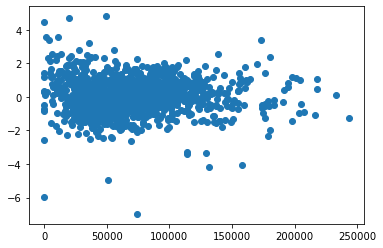

In [153]:
plt.scatter(x = corolla_2['KM'] ,y = error)

#  Zero Residual mean

Text(0.5, 1.0, 'Zero Residual Mean - Acutal o/p Vs Predticed o/p')

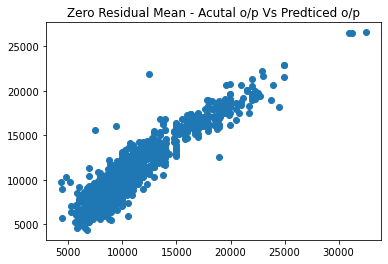

In [155]:
plt.scatter(x = y , y= y_pred_1)
plt.title('Zero Residual Mean - Acutal o/p Vs Predticed o/p')

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [159]:
mean_absolute_error(y,y_pred_1)

1001.5466325182533

In [160]:
mean_squared_error(y,y_pred_1)

1790935.608390293

In [162]:
r2_score(y,y_pred_1)

0.8637627463428191

## Detecting Influencers/Outliers

## Cook’s Distance

In [175]:
model_influence = corolla_2_linear.get_influence()
(c,_)= model_influence.cooks_distance

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

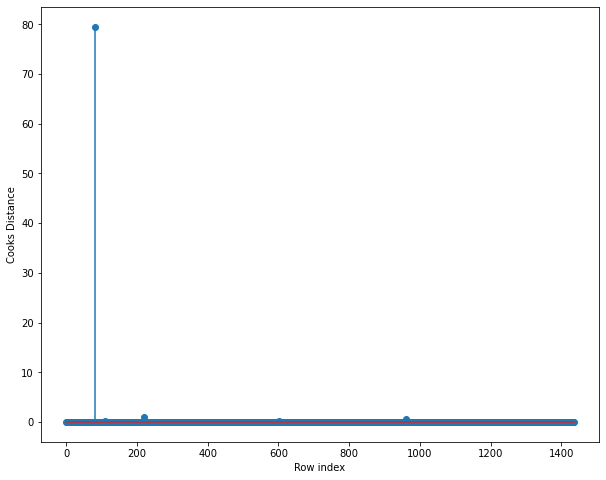

In [176]:
plt.figure(figsize=(10,8))
plt.stem(np.arange(len(corolla_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [179]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.5201062413898)

## High Influence points

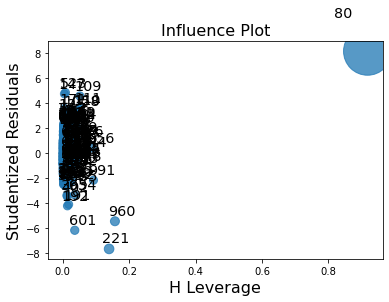

In [180]:
influence_plot(corolla_2_linear)
plt.show()

In [182]:
corolla3 =corolla_2.drop(corolla_2.index[80],axis = 0)


In [184]:
X = corolla3.drop('Price',axis=1)
y = corolla3[['Price']]

In [187]:
corolla_3_linear = smf.ols('y~X',data = corolla3).fit()

In [188]:
corolla_3_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:30:31   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
X[0]        -120.4550      2.562    -47.021      0.000    -125.480    -115.430
X[1]          -0.0178      0.001    -13.973      0.000      -0.020      -0.015
X[2]          39.3463      2.911     13.516      0.000      33.636      45.057
X[3]          -2.5242      0.307     -8.216      0.000      -3.127      -1.922
X[4]         -27.2285     39.241     -0.694      0.488    -104.206      49.749
X[5]         523.9416    192.865      2.717      0.007     145.612     902.271
X[6]           9.0440      1.425      6.348      0.000       6.249      11.839
X[7]          20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
corolla_3_linear.rsquared

0.8693790488655818